In [1]:
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pipeline_v200
reload(pipeline_v200)
import helper_functions
import qutip

sns.set_palette("Set2")
# sns.color_palette("Set2")

In [18]:
n = 4 ## numero finale di qubit
N = 5 ## numero di qubit prima della traccia parziale

h_z_s = np.linspace(0, 2.5, num=20) # spazio dei valori di h_z

a_x= 1

delta = 0.1
derivative_delta = 1e-5

m = 1
DEBUG=True

initial_state = helper_functions.random_mixed_density_matrix(N, n)

# ket = qutip.rand_ket(2**n, distribution="haar").full().flatten()

y_s = np.array([pipeline_v200.simulation(
                        N=N,
                        n=n,
                        initial_state= initial_state,
                        DEBUG=True,
                        derivative_delta=derivative_delta,
                        a_x= a_x, 
                        h_z= h_z, ## variable
                        delta = delta,
                        m = m) for h_z in h_z_s])

# just for plotting clarity
sparse_indices = np.array([i for i in list(range(len(h_z_s))) if i%10==0])

Generating random mixed density matrix
purity of initial state = (0.5152021020860149-2.168404344971009e-18j) 
Dimension of the Hilbert space: 16
Initial state type: <class 'numpy.ndarray'> | initial_state: [[ 6.26140205e-02-5.68940907e-19j -4.08261064e-02-1.27037775e-02j
  -7.30867197e-04-5.31560686e-02j -5.74361540e-02+2.57235064e-02j
   4.82293429e-02+2.46756931e-02j  5.88126834e-02+6.99613890e-02j
   1.25398162e-02-1.23225558e-03j  1.32205446e-02+2.24819161e-02j
  -1.73631392e-02+1.17985038e-02j  8.14805358e-03-2.43513083e-02j
   4.66994491e-02-3.88024640e-03j  2.78812449e-02-2.04008770e-02j
   1.33854523e-02+9.88291685e-03j  2.15028525e-02-2.27974064e-02j
   1.84007012e-02-3.03401810e-03j  9.17097995e-03+3.66514812e-02j]
 [-4.08261064e-02+1.27037775e-02j  9.74439600e-02+2.93690893e-18j
  -4.44796421e-03-6.79561598e-03j  2.29429928e-02+4.13001650e-02j
  -9.23686813e-02-2.32886000e-02j -6.97758334e-02-4.55682281e-02j
  -3.10912871e-02+9.23388302e-03j -1.11135066e-02-4.73685218e-02j
 

purity of initial state = (0.5152021020860149-2.168404344971009e-18j) 
Dimension of the Hilbert space: 16
Initial state type: <class 'numpy.ndarray'> | initial_state: [[ 6.26140205e-02-5.68940907e-19j -4.08261064e-02-1.27037775e-02j
  -7.30867197e-04-5.31560686e-02j -5.74361540e-02+2.57235064e-02j
   4.82293429e-02+2.46756931e-02j  5.88126834e-02+6.99613890e-02j
   1.25398162e-02-1.23225558e-03j  1.32205446e-02+2.24819161e-02j
  -1.73631392e-02+1.17985038e-02j  8.14805358e-03-2.43513083e-02j
   4.66994491e-02-3.88024640e-03j  2.78812449e-02-2.04008770e-02j
   1.33854523e-02+9.88291685e-03j  2.15028525e-02-2.27974064e-02j
   1.84007012e-02-3.03401810e-03j  9.17097995e-03+3.66514812e-02j]
 [-4.08261064e-02+1.27037775e-02j  9.74439600e-02+2.93690893e-18j
  -4.44796421e-03-6.79561598e-03j  2.29429928e-02+4.13001650e-02j
  -9.23686813e-02-2.32886000e-02j -6.97758334e-02-4.55682281e-02j
  -3.10912871e-02+9.23388302e-03j -1.11135066e-02-4.73685218e-02j
  -5.51620813e-02-2.67378313e-02j -3.452

In [19]:
y_s[0]

{'fidelity_truncated': 0.5828089386053877,
 'fidelity_truncated_generalized': (0.9999609293367998-7.75205787163214e-19j),
 'correction_term': (0.41715199073141207-7.75205787163214e-19j),
 'fidelity_true': 0.99022354161970773355,
 'fidelity_pennylane': 0.9794604302691289,
 'lower_tqfi': (0.03125653056015309+6.201646297305711e-16j),
 'upper_tqfi': 333.75284911568974,
 'qfi_fidelity': 7.821166704233811641,
 'sub_qfi_bound': 0.023018625319348725,
 'super_qfi_bound': (333.75284910339246+6.2628263697656e-06j),
 'H_delta': (0.03125653056015309+6.201646297305711e-16j),
 'J_delta': (333.75284910339246+6.2628263697656e-06j),
 'trace_rho': (1.0000000000000002-1.3010426069826053e-18j),
 'trace_rho_delta': (1+4.14029704617902e-18j),
 'purity_rho': (0.5152021020860151-1.5246593050577406e-17j),
 'purity_rho_delta': (0.515202102086015+4.1386029802845115e-18j),
 'rank_rho': 2,
 'rank_rho_delta': 2,
 'truncated_eigenvalues': array([0.58718401]),
 'eigenvalues': array([ 5.87184007e-01,  4.12815993e-01,  

In [20]:
# pipelines return debug info only if we are in DEBUG==True
purity_rho = np.array([np.real(x["purity_rho"]) for x in y_s ])
purity_rho_delta = np.array([np.real(x["purity_rho_delta"]) for x in y_s ])
lower_tqfi = np.array([np.real(x["lower_tqfi"]) for x in y_s ])
upper_tqfi = np.array([np.real(x["upper_tqfi"]) for x in y_s ])
qfi_fidelity = np.array([np.real(x["qfi_fidelity"]) for x in y_s ])
true_fidelity = np.array([np.real(x["fidelity_true"]) for x in y_s ])
fidelity_truncated = np.array([np.real(x["fidelity_truncated"]) for x in y_s ])
fidelity_generalized = np.array([np.real(x["fidelity_truncated_generalized"]) for x in y_s ])
fidelity_pennylane = np.array([np.real(x["fidelity_pennylane"]) for x in y_s ])

sub_qfi_bound = np.array([np.real(x["sub_qfi_bound"]) for x in y_s ])
super_qfi_bound = np.array([np.real(x["super_qfi_bound"]) for x in y_s ])
qfi_from_sld = np.array([np.real(x["QFI_from_SLD"]) for x in y_s ])

error = np.max([np.imag(x["lower_tqfi"]) for x in y_s ])
print(error)

8.339855563928152e-15


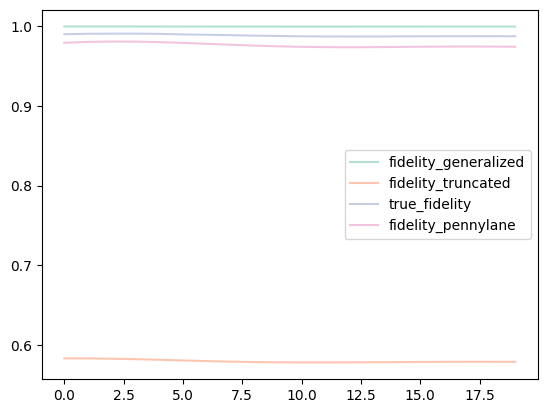

In [21]:
plt.plot(fidelity_generalized, label="fidelity_generalized", alpha=0.5)
plt.plot(fidelity_truncated, label="fidelity_truncated", alpha=0.5)
plt.plot(true_fidelity, label="true_fidelity", alpha=0.5)
plt.plot(fidelity_pennylane, label="fidelity_pennylane", alpha=0.5)
plt.legend()

In [107]:
"""
TODO overleaf e implementazione
To check: 
fare prove con n e N variabili e valutare quando la fidelity con la matrice densita' troncata supera i 2/3. Un limite puo' essere dato da m ~ R. Dove R e' il participation ratio

"""

sparse_indices = list(range(len(h_z_s)))

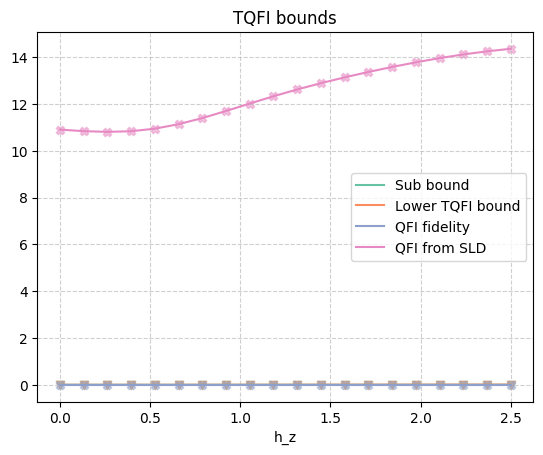

In [108]:
plt.scatter(h_z_s[sparse_indices], sub_qfi_bound[sparse_indices], marker="v", alpha=0.5)
plt.plot(h_z_s, sub_qfi_bound, label="Sub bound")
#plt.scatter(h_z_s[sparse_indices], super_qfi_bound[sparse_indices], marker="v", alpha=0.5)
#plt.plot(h_z_s, super_qfi_bound, label="Super bound")
plt.scatter(h_z_s[sparse_indices], lower_tqfi[sparse_indices], marker="v", alpha=0.5)
plt.plot(h_z_s, lower_tqfi, label="Lower TQFI bound")
#plt.scatter(h_z_s[sparse_indices], (upper_tqfi[sparse_indices]), marker="^", alpha=0.5)
#plt.plot(h_z_s, (upper_tqfi), label="Upper TQFI bound")
plt.scatter(h_z_s[sparse_indices], (qfi_fidelity[sparse_indices]), marker="X", alpha=0.5)
plt.plot(h_z_s, (qfi_fidelity), label="QFI fidelity")
plt.scatter(h_z_s[sparse_indices], (qfi_from_sld[sparse_indices]), marker="X", alpha=0.5)
plt.plot(h_z_s, (qfi_from_sld), label="QFI from SLD")
plt.title("TQFI bounds")
plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability
plt.xlabel("h_z")
plt.legend()
plt.show()

In [109]:
print(f"max at h_z = {h_z_s[np.argmax(lower_tqfi)]}")

max at h_z = 2.5


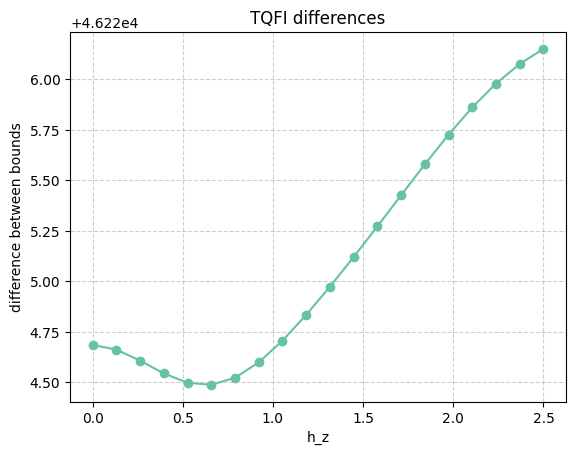

In [110]:
plt.scatter(h_z_s,upper_tqfi - lower_tqfi)
plt.plot(h_z_s,upper_tqfi - lower_tqfi)
plt.title("TQFI differences")
plt.ylabel("difference between bounds")
plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability
plt.xlabel("h_z")
plt.show()

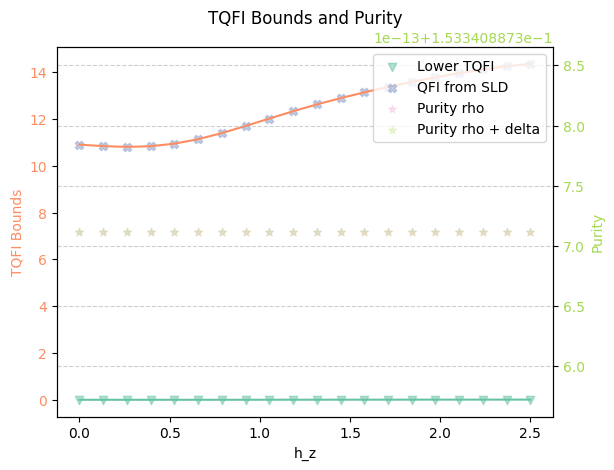

In [111]:
fig, ax1 = plt.subplots()

palette = sns.color_palette("Set2")
# First y-axis

#ax1.scatter(h_z_s, super_qfi_bound, marker="^", alpha=0.5, label="Super QFI bound", color =  palette[0])
#ax1.plot(h_z_s, super_qfi_bound)
#ax1.scatter(h_z_s, upper_tqfi, marker="^", alpha=0.5, label="Upper TQFI", color =  palette[1])
#ax1.plot(h_z_s, upper_tqfi)



ax1.scatter(h_z_s, lower_tqfi, alpha=0.5, marker="v", label="Lower TQFI", color = palette[0])
ax1.plot(h_z_s, lower_tqfi)


ax1.scatter(h_z_s, qfi_from_sld, marker= "X", alpha=0.5, label="QFI from SLD", color = palette[2])
ax1.plot(h_z_s, qfi_from_sld)

ax1.set_xlabel("h_z")
ax1.set_ylabel("TQFI Bounds", color= palette[1])
ax1.tick_params(axis='y', labelcolor= palette[1])

# Second y-axis
ax2 = ax1.twinx()
ax2.scatter(h_z_s, purity_rho, alpha=0.2, marker="*",label="Purity rho", 
            color= palette[3])
ax2.scatter(h_z_s, purity_rho_delta, alpha=0.2, marker="*", label="Purity rho + delta", color = palette[4])

ax2.set_ylabel("Purity", color=palette[4])
ax2.tick_params(axis='y', labelcolor=palette[4])

plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability

# Legend
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.title("TQFI Bounds and Purity")
plt.show()


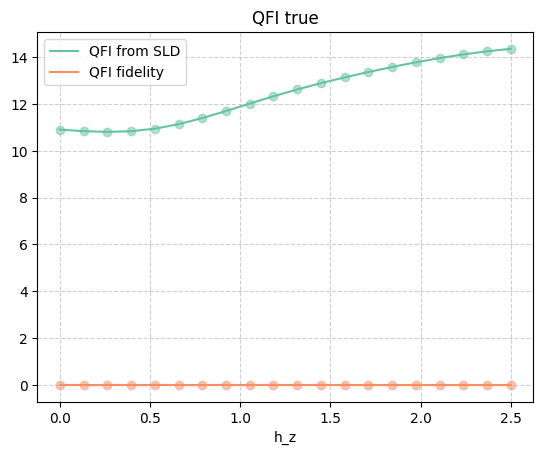

In [112]:
plt.scatter(h_z_s,qfi_from_sld, alpha=0.5)
plt.plot(h_z_s,qfi_from_sld, label="QFI from SLD")
plt.scatter(h_z_s,qfi_fidelity, alpha=0.5)
plt.plot(h_z_s,qfi_fidelity, label="QFI fidelity")
plt.xlabel("h_z")
plt.title("QFI true")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability


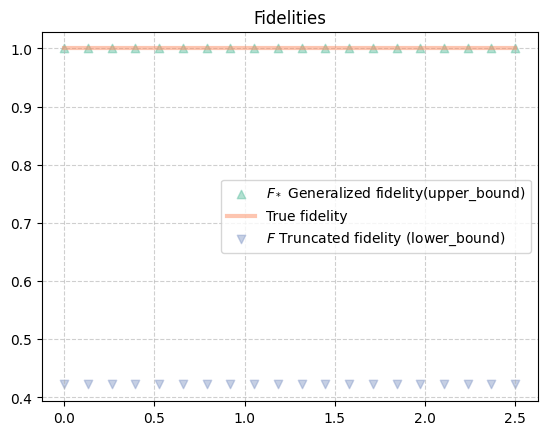

In [113]:
plt.scatter(h_z_s[sparse_indices], 
            fidelity_generalized[sparse_indices], 
            label="$F_*$ Generalized fidelity(upper_bound)", 
            alpha=0.5, marker="^", linewidth=1, color= palette[0])

plt.plot(h_z_s, true_fidelity, label="True fidelity", alpha=0.5, linewidth=3, color=palette[1])

plt.scatter(h_z_s[sparse_indices], fidelity_truncated[sparse_indices],
             label="$F$ Truncated fidelity (lower_bound)", 
             alpha=0.5,marker="v", 
             linewidth=1, color=palette[2])
plt.legend()
plt.title("Fidelities")
plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability

In [114]:
all(true_fidelity <=  fidelity_generalized) & \
all(true_fidelity >= fidelity_truncated)

False

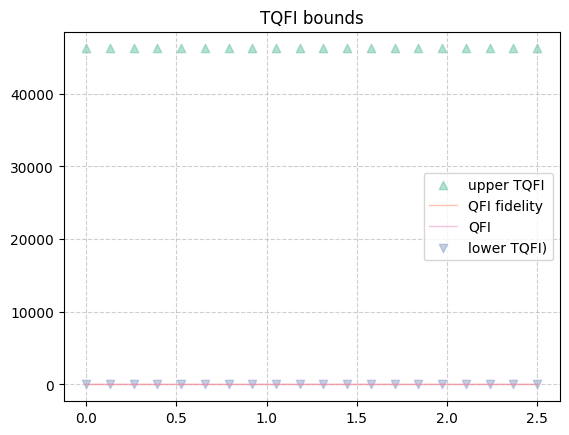

In [115]:
plt.scatter(h_z_s[sparse_indices], 
            upper_tqfi[sparse_indices], 
            label="upper TQFI", 
            alpha=0.5, marker="^", linewidth=1, color= palette[0])

plt.plot(h_z_s, qfi_fidelity, label="QFI fidelity", alpha=0.5, linewidth=1, color=palette[1])
plt.plot(h_z_s, qfi_from_sld, label="QFI", alpha=0.5, linewidth=1, color=palette[3])

plt.scatter(h_z_s[sparse_indices], 
            lower_tqfi[sparse_indices],
             label="lower TQFI)", 
             alpha=0.5,marker="v", 
             linewidth=1, color=palette[2])
plt.legend()
plt.title("TQFI bounds")
plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability

In [116]:
all(lower_tqfi <= qfi_from_sld) & \
all(qfi_from_sld <= upper_tqfi)

True

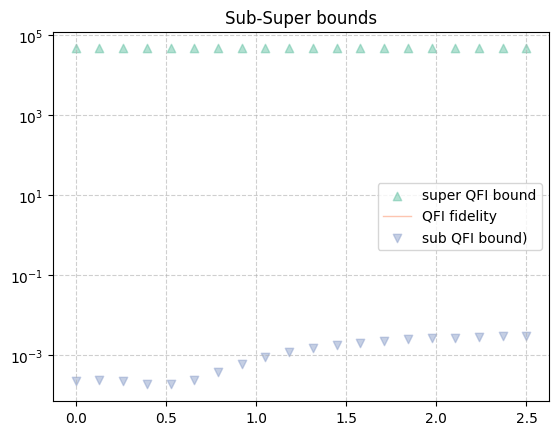

In [117]:
plt.scatter(h_z_s[sparse_indices], 
            super_qfi_bound[sparse_indices], 
            label="super QFI bound", 
            alpha=0.5, marker="^", linewidth=1, color= palette[0])

plt.plot(h_z_s, qfi_fidelity, label="QFI fidelity", alpha=0.5, linewidth=1, color=palette[1])
# plt.plot(h_z_s, qfi_from_sld, label="QFI", alpha=0.5, linewidth=1, color=palette[3])

plt.scatter(h_z_s[sparse_indices], 
            sub_qfi_bound[sparse_indices],
             label="sub QFI bound)", 
             alpha=0.5,marker="v", 
             linewidth=1, color=palette[2])
plt.yscale("log")
plt.legend()
plt.title("Sub-Super bounds")
plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability

In [118]:
all(super_qfi_bound >= qfi_from_sld)
all(qfi_from_sld >= sub_qfi_bound)

True

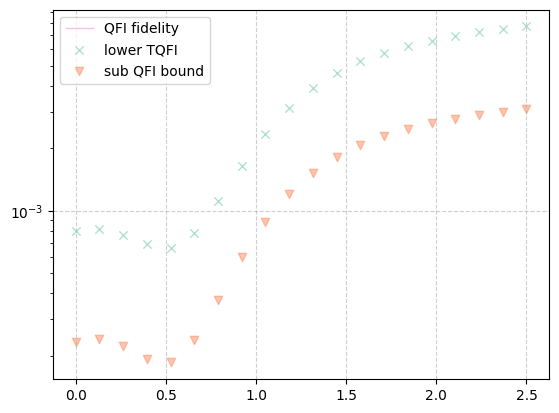

In [119]:
plt.plot(h_z_s, qfi_fidelity, label="QFI fidelity", alpha=0.5, linewidth=1, color=palette[3])
#plt.plot(h_z_s, qfi_from_sld, label="QFI", alpha=0.5, linewidth=1, color=palette[4])

plt.scatter(h_z_s[sparse_indices], 
            lower_tqfi[sparse_indices],
             label="lower TQFI", 
             alpha=0.5,marker="x", 
             linewidth=1, color=palette[0])

plt.scatter(h_z_s[sparse_indices], 
            sub_qfi_bound[sparse_indices], 
            label="sub QFI bound", 
            alpha=0.5, marker="v", linewidth=1, color= palette[1])
# scale log
plt.yscale("log")

plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability

plt.legend()

In [120]:
all(sub_qfi_bound <= lower_tqfi)

True

True


Text(0.5, 1.0, 'Super QFI - TQFI')

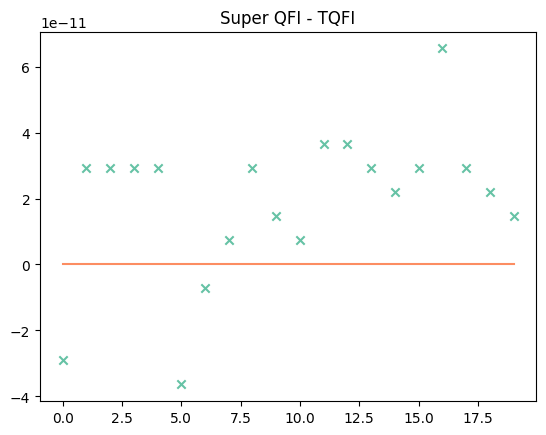

In [121]:
print(any(sub_qfi_bound <= lower_tqfi))
plt.scatter(x = list(range(len(lower_tqfi))), y = super_qfi_bound - upper_tqfi, marker="x")
plt.plot([0]*len(lower_tqfi), color=palette[1])
plt.title("Super QFI - TQFI")


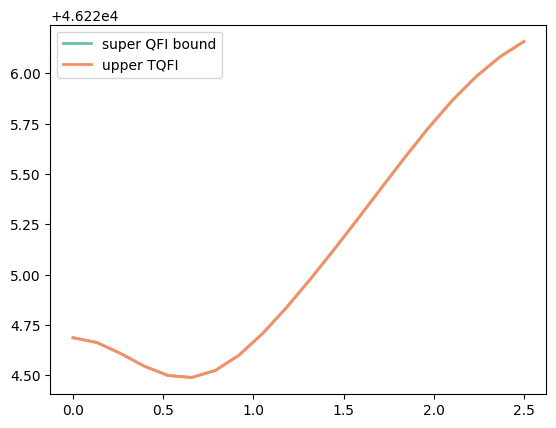

In [122]:
a = 0
b = len(h_z_s)
segment = range(a,b)
plt.plot(h_z_s[segment], 
            super_qfi_bound[segment], 
            label="super QFI bound", 
            alpha=1, linewidth=2, color= palette[0])
plt.plot(h_z_s[segment], 
            upper_tqfi[segment],
             label="upper TQFI", 
             alpha=1,
             linewidth=2, color=palette[1])
plt.legend()

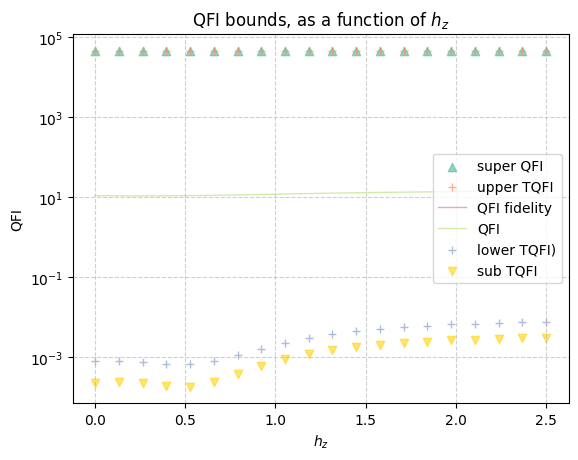

In [123]:
# shift some indices just gor clarity
#sparse_indices_1 = (np.array(sparse_indices) + 2)[(np.array(sparse_indices) + 2 ) < len(h_z_s)]
# or not
sparse_indices_1 = sparse_indices

plt.scatter(h_z_s[sparse_indices], 
            super_qfi_bound[sparse_indices], 
            label="super QFI", 
            alpha=0.7, marker="^", linewidth=1, color= palette[0])

#plt.plot(h_z_s,super_qfi_bound, alpha=0.7, linewidth=1, color= palette[0])

plt.scatter(h_z_s[sparse_indices_1], 
            upper_tqfi[sparse_indices_1],
             label="upper TQFI", 
             alpha=0.7,marker="+", 
             linewidth=1, color=palette[1])

plt.plot(h_z_s, qfi_fidelity, label="QFI fidelity", alpha=0.8, linewidth=1, color=palette[3])
plt.plot(h_z_s, qfi_from_sld, label="QFI", alpha=0.5, linewidth=1, color=palette[4])

plt.scatter(h_z_s[sparse_indices], 
            lower_tqfi[sparse_indices],
             label="lower TQFI)", 
             alpha=0.7,marker="+", 
             linewidth=1, color=palette[2])
 
plt.scatter(h_z_s[sparse_indices_1], 
            sub_qfi_bound[sparse_indices_1],
             label="sub TQFI", 
             alpha=0.7,marker="v", 
             linewidth=1, color=palette[5])
             
plt.yscale("log")
plt.ylabel("QFI")
plt.xlabel("$h_z$")
plt.legend()
plt.title("QFI bounds, as a function of $h_z$")

plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability

In [124]:
len(super_qfi_bound)

20

In [125]:
print(f"maximum QFI at h_z = {h_z_s[np.argmax(qfi_fidelity)]}")

maximum QFI at h_z = 0.0


In [126]:
qfi_fidelity

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float128)

In [130]:
true_fidelity

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.], dtype=float128)